In [1]:
from datetime import date
import yfinance as yf
from prophet import Prophet

In [4]:
data = yf.download("SOFI", "2021-01-04", date.today().strftime("%Y-%m-%d"))
data.reset_index(inplace=True)

data.tail()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
745,2023-12-19,9.78,9.995,9.660,9.94,9.94,51836700
746,2023-12-20,9.91,10.160,9.230,9.31,9.31,75814700
747,2023-12-21,9.53,9.670,9.390,9.64,9.64,41803000
748,2023-12-22,9.77,9.880,9.585,9.71,9.71,29080400
749,2023-12-26,9.83,9.990,9.745,9.96,9.96,25811800


In [6]:
df_train = data[['Date', 'Close']].rename(columns={"Date": "ds", "Close": "y"})

In [13]:
m = Prophet()
m.fit(df_train)

09:14:45 - cmdstanpy - INFO - Chain [1] start processing
09:14:45 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future = m.make_future_dataframe(periods=500)
forecast = m.predict(future)

In [19]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1245,2025-05-05,6.378914,-1.200450,13.959175
1246,2025-05-06,6.359798,-0.805068,13.635657
1247,2025-05-07,6.424148,-1.207236,13.799630
1248,2025-05-08,6.483019,-1.109121,13.936444
1249,2025-05-09,6.468577,-1.350860,14.041554


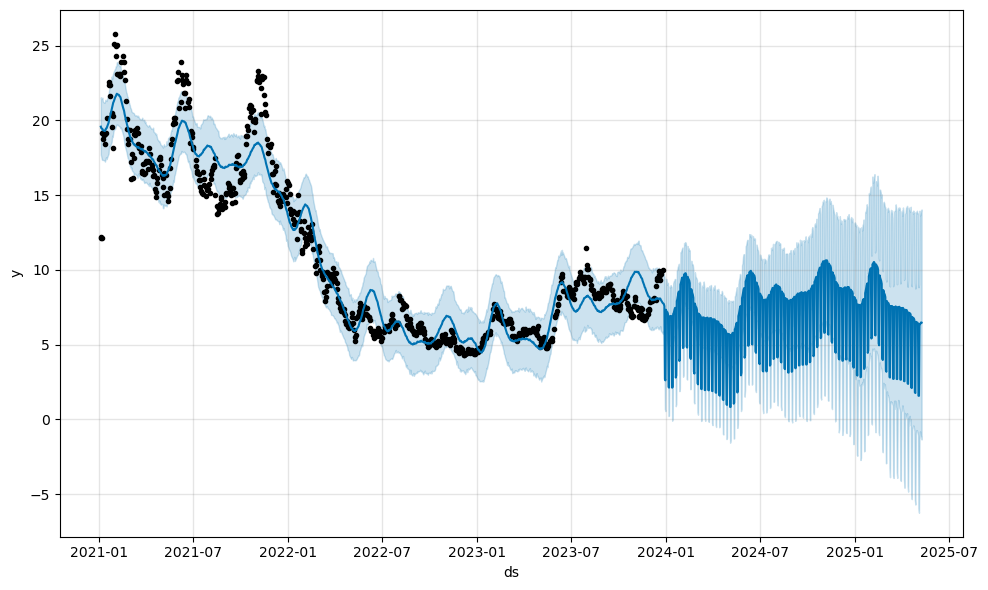

In [20]:
fig1 = m.plot(forecast)